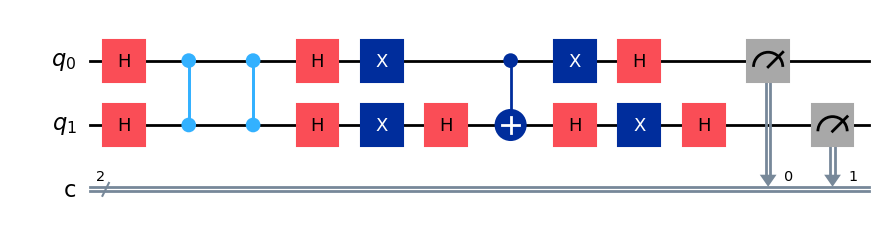

In [17]:
# Import required Qiskit classes
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Step 1: Create a 2-qubit circuit
qc = QuantumCircuit(2, 2)

# Step 2: Create equal superposition
qc.h([0, 1])

# Step 3: Oracle for |11>
qc.cz(0, 1)
qc.cz(1, 0)

# Step 4: Diffusion operator
qc.h([0, 1])
qc.x([0, 1])
qc.h(1)
qc.cx(0, 1)
qc.h(1)
qc.x([0, 1])
qc.h([0, 1])

# Step 5: Measure
qc.measure([0, 1], [0, 1])

# Draw circuit
qc.draw('mpl')


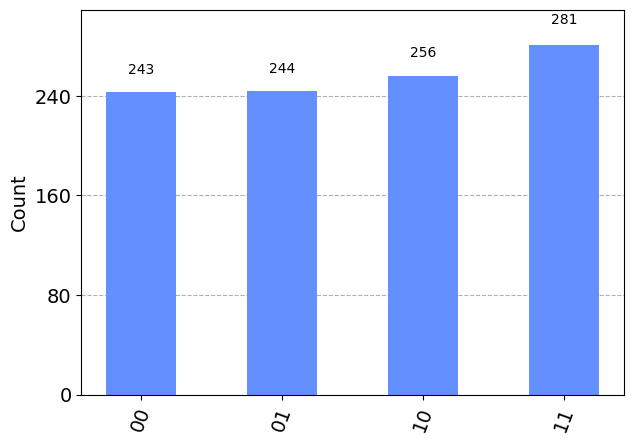

In [18]:
# Run simulation
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

# Display results
plot_histogram(counts)


In [19]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import PhaseOracle

# n=3 qubits
n = 3
threshold = 5

# Define Boolean function for x < 5
# x2 x1 x0 are qubit variables
# x < 5 -> 0,1,2,3,4 in binary
# 0->000, 1->001, 2->010, 3->011, 4->100
expr = "(~x2 & ~x1 & ~x0) | (~x2 & ~x1 & x0) | (~x2 & x1 & ~x0) | (~x2 & x1 & x0) | (x2 & ~x1 & ~x0)"

oracle = PhaseOracle(expr)

# Grover circuit
from qiskit.algorithms import Grover
from qiskit_aer import AerSimulator

grover = Grover(oracle=oracle, quantum_instance=AerSimulator())
result = grover.run()
print(result)


MissingOptionalLibraryError: "The 'tweedledum' library is required to use 'PhaseOracle'. You can install it with 'pip install tweedledum'."